---
title: Regressor as a Classifier UCI-HAR
author: ["Jiya Desai", "Siya Patil", "Aadya Arora"]
date: "2024-03-06"
format:
    html:
        code-fold: false
        code-tools: true
jupyter: python3
image: "output.png"
categories: ["Classification"]

---

In [93]:
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 


# Library imports
import pandas as pd
import numpy as np
import os
import tsfel


# Give the path of the test and train folder of UCI HAR Dataset
train_path = "C:/Users/jiyad/OneDrive/Desktop/ML2/dataset_folder/train"
test_path = "C:/Users/jiyad/OneDrive/Desktop/ML2/dataset_folder/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Done Combining the training data
Done Combining the testing data
Done Combining the data


In [94]:
# This file is used to create the dataset. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.


# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


## Flattened out Linear Acceleration:

In [95]:
aXYZ_Xtrain = X_train[:, :, 0], X_train[:, :, 1], X_train[:, :, 2]

X_train_TS = np.sum(np.square(X_train), axis = -1)
X_test_TS = np.sum(np.square(X_test), axis = -1)
X_val_TS = np.sum(np.square(X_val), axis = -1)
print(X_train_TS.shape, X_test_TS.shape, X_val_TS.shape)

df = pd.DataFrame(X_train_TS)

classesN = {1 : 'WALKING', 2 : 'WALKING_UPSTAIRS', 3 : 'WALKING_DOWNSTAIRS', 4 : 'SITTING', 5 : 'STANDING', 6 : 'LAYING'}
namedLabel = [classesN[i] for i in y_train]




(108, 500) (36, 500) (36, 500)


## Featurising train data

In [ ]:
cfg = tsfel.get_features_by_domain()
dataFrames = []
for i in df.index:
    dataFrames.append(tsfel.time_series_features_extractor(cfg, df.iloc[i, :-1], fs = 50))
dfN = pd.concat(dataFrames, axis = 0)

dfN["Labels"] = y_train
dfN["Subject"] = range(1, 109)
dfN["Named_Subject"] = namedLabel
dfN.to_csv("FeaturesTimeSeries.csv")



In [97]:
dfN.shape

(108, 386)

## Featuriser function - featurise entire dataset (without particular features)

In [110]:
def Featuriser_all(XTimeSeries, YTimeSeries):
    cfg = tsfel.get_features_by_domain()
    df = pd.DataFrame(XTimeSeries)
    dataFrames = []
    for i in df.index:
        dataFrames.append(tsfel.time_series_features_extractor(cfg, df.iloc[i,:], fs = 50))
    dfN = pd.concat(dataFrames, axis = 0)
    dfN["Labels"] = YTimeSeries
    namedLabel = [classesN[i] for i in YTimeSeries]
    dfN["Named_Subject"] = namedLabel
    dfN["Subject"] = range(1, len(XTimeSeries) + 1)
    return dfN

## Featurising test data (all features)

In [ ]:
df_test_all=Featuriser_all(X_test_TS, y_test)

## Dataframes of training and testing data:

In [111]:

X_train_all=dfN[dfN.columns[:-3]]
y_train_df = pd.DataFrame(data = y_train) 
test_feat=df_test_all[df_test_all.columns[:-3]] #df_test_all is the featurised attributes+labels dataset given by the featuriser function
#test_feat is the test data with features only
# y_test - testing labels


# removing an unnecessary column
for col in test_feat.columns:
    if '0_FFT mean coefficient_250' in col:
        del test_feat[col]

In [112]:
print(X_train_all.shape)
print(y_train_df.shape)
print(test_feat.shape)
print(y_test.shape)

(108, 383)
(108, 1)
(36, 383)
(36,)


## Removing all-zero columns from the dataset: (both training and testing)

In [113]:

# Finding columns with all zeros in the training dataset
non_zero_columns_train = np.any(X_train_all != 0, axis=0)

# Removing columns with all zeros from the training dataset
X_train_all = X_train_all.loc[:, non_zero_columns_train]

# Removing corresponding columns from the testing dataset
test_feat = test_feat.loc[:, non_zero_columns_train]


## 1. Decision Tree Classifier for all features:

In [103]:
#DT classifier for all features
from sklearn import tree
from sklearn.metrics import accuracy_score

classifier_sk = tree.DecisionTreeClassifier()
classifier_sk = classifier_sk.fit(X_train_all, y_train_df)


target_pred = classifier_sk.predict(test_feat)
accuracy_score(target_pred, y_test, normalize=True)

0.6111111111111112

## 2. Random Forest Classifier for all features

In [104]:
#random forrest
from sklearn.ensemble import RandomForestClassifier


classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train_all, y_train_df)

target_pred_rf = classifier_rf.predict(test_feat)
accuracy_score(target_pred_rf, y_test, normalize=True)

c:\Users\jiyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7777777777777778

The accuracy of the Random Forest model is better than that of the decision tree classifier, as expected. This is because Random Forest is an ensemble method of classification.

## 3. Classification using linear regression for all features

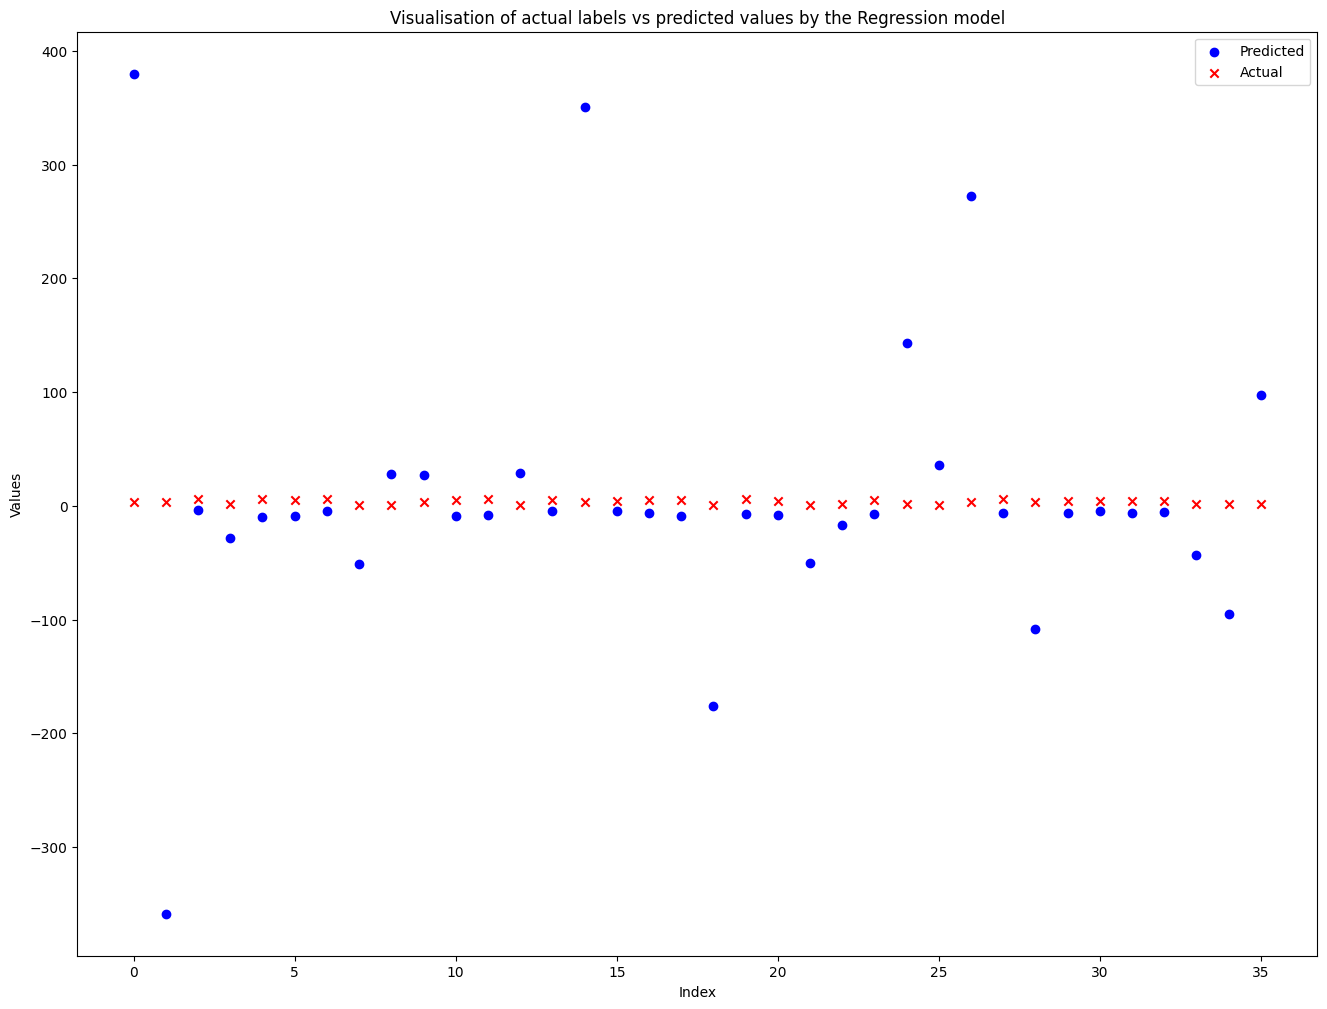

In [109]:
#linear regressor

from sklearn.linear_model import LinearRegression
reg_sk_all = LinearRegression().fit(X_train_all, y_train_df)
target_pred_lr_all=reg_sk_all.predict(test_feat)

# there is no trivial way to map the predicted values in the range {1,2,3,4,5,6} (corresponding to our 6 sixes). Linear regression is not a good classifier with so many features.

# plotting the actual and predicted values

import matplotlib.pyplot as plt

data_set1 = np.array(target_pred_lr_all)
data_set2 = np.array(y_test) 

plt.figure(figsize=(16,12))


plt.scatter(range(len(data_set1)), data_set1, label='Predicted', color='blue', marker='o')
plt.scatter(range(len(data_set2)), data_set2, label='Actual', color='red', marker='x')
plt.title('Visualisation of actual labels vs predicted values by the Regression model')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()



The values predicted by the linear regression model don't show any specific pattern; it is difficult to map them to the 6 class labels we have (1,2,3,4,5,6). So, we don't have a direct way of calculating the 'accuracy' of the linear regression classifier.

Till now : we tried DT, RF and LR on the entire dataset, with all the features extracted from the original timeseries data. DT and RF gave expected results, but LR did not. Linear regression is clearly a bad classifier when we have such a large number of features. Linear regression may encounter challenges when applied to classification tasks with multiple features due to several reasons:

1. Assumption of Linearity: Linear regression assumes a linear relationship between the input features and the target variable. In classification tasks, especially when dealing with non-linear decision boundaries, a linear model might not capture the underlying patterns adequately.

2. Output Range: Linear regression predicts continuous values, which can span a range of real numbers. In a classification problem, we typically have discrete class labels, and predicting continuous values may not be meaningful for assigning classes. In this problem, too, the regression model predicts label values in the range (-400, 400), and most of the overshot values are outliers. There isn't an easy way to map it to a label value between 1 and 6.

3. Sensitivity to Outliers: Linear regression is sensitive to outliers, and in a classification context, outliers may have a more significant impact on the overall performance of the model, as can be seen here.

## Question 7 : Feature importances of random forest and weights of linear regression

In [106]:
# random forest feature importances
importances = classifier_rf.feature_importances_

# linear regression coefficients (weights)
weights = reg_sk_all.coef_
weights = abs(weights)
normalized_weights_list = []
for i in weights:
    normalized_weights_list.append(i/(weights.sum()))
normalized_weights=np.array(normalized_weights_list)


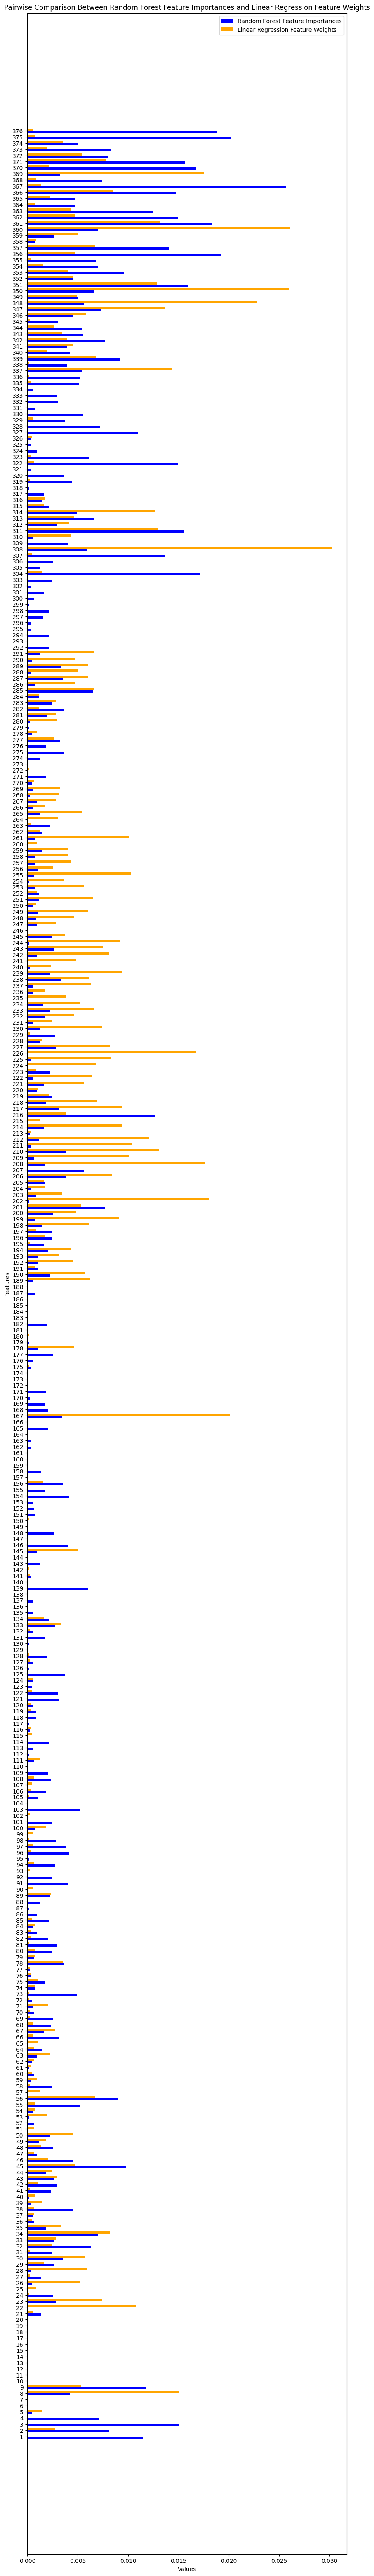

In [114]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 80))
bar_height = 0.35

indices = np.arange(len(importances))
plt.barh(indices, importances, height=bar_height, label='Random Forest Feature Importances', color='blue')
plt.barh(indices + bar_height, normalized_weights[0], height=bar_height, label='Linear Regression Feature Weights', color='orange')


plt.ylabel('Features')
plt.xlabel('Values')
plt.title('Pairwise Comparison Between Random Forest Feature Importances and Linear Regression Feature Weights')
plt.yticks(indices + bar_height / 2, list(range(1, 377)))
plt.legend()
plt.show()


## Top 10 most important features for both the models:

In [ ]:
# random forest:
import numpy as np
 
sorted_indices = np.argsort(importances)[::-1]
 
# printing the top 10 most important features given by the Random Forest model:
for f in range(10):
    print("%2d) %-*s %f" % (f + 1, 30,
                            X_train_all.columns[sorted_indices[f]],
                            importances[sorted_indices[f]]))
    



 1) 0_Wavelet variance_2           0.027935
 2) 0_Wavelet standard deviation_8 0.025901
 3) 0_Wavelet energy_8             0.024402
 4) 0_Wavelet variance_8           0.019768
 5) 0_FFT mean coefficient_5       0.018407
 6) 0_Area under the curve         0.017665
 7) 0_Wavelet energy_7             0.017059
 8) 0_Wavelet standard deviation_2 0.014469
 9) 0_Wavelet standard deviation_7 0.013893
10) 0_Spectral decrease            0.013855


In [ ]:
# Linear regression model:
normalized_weights[0]

sorted_indices = np.argsort(normalized_weights[0])[::-1]
 
# printing the top 10 most important features given by the linear regression model:
for f in range(10):
    print("%2d) %-*s %f" % (f + 1, 30,
                            X_train_all.columns[sorted_indices[f]],
                            normalized_weights[0][sorted_indices[f]]))
    

 1) 0_Mean absolute deviation      0.030230
 2) 0_Wavelet standard deviation_1 0.026112
 3) 0_Wavelet energy_1             0.026036
 4) 0_Wavelet absolute mean_8      0.022787
 5) 0_FFT mean coefficient_23      0.020140
 6) 0_FFT mean coefficient_37      0.018065
 7) 0_FFT mean coefficient_42      0.017664
 8) 0_Wavelet variance_1           0.017497
 9) 0_FFT mean coefficient_59      0.016765
10) 0_ECDF Percentile_0            0.015032


The top 10 most important features selected by the random forest model are:
1) Wavelet variance_2          
 2) Wavelet standard deviation_8 
 3) Wavelet energy_8             
 4) Wavelet variance_8           
 5) FFT mean coefficient_5       
 6) Area under the curve       
 7) Wavelet energy_7             
 8) Wavelet standard deviation_2
 9) Wavelet standard deviation_7 
10) Spectral decrease

The top 10 most important features selected by the linear regression model are:

 1) Mean absolute deviation     
 2) Wavelet standard deviation_1 
 3) Wavelet energy_1           
 4) Wavelet absolute mean_8    
 5) FFT mean coefficient_23   
 6) FFT mean coefficient_37  
 7) FFT mean coefficient_42      
 8) Wavelet variance_1         
 9) FFT mean coefficient_59     
10) ECDF Percentile_0 

The following inferences can be drawn from the obtained feature list:

1. The values of the importances/weights in each case shows that there is no one feature that is particularly dominant. Even the largest values are 0.027935 (corresponding to Wavelet variance_2 ) and 0.030230 (corresponding to 0_Mean absolute deviation) respectively. This may be because of the large number of features we have considered. Also, in the case of linear regression, we normalised the weights by dividing the weights by the total number of features. Since we have not considered feature correlation so far, this normalisation metric also causes the assignment of importances to be this broad.

2. Certain common features can be seen having more importance than others in both the cases : wavelet variance, wavelet energy and wavelet standard deviation. These features provide more information than the others in the classification task, making them better choices if we have to select only particular features for classification.

In conclusion, we can say that the use of Linear regression for a classification task such as this one is not justified, as seen in the results obtained by the regression model. The reasons for the same have been described above.